# Explore GRS images

## Load python libraries

In [1]:

import glob
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as xrio # activate the rio accessor
import hvplot.xarray # activate the hvplot accessor

import pyproj as ppj
#import cartopy
import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import locale
#locale.setlocale(locale.LC_ALL, 'en_US.utf8')

import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.use('TkAgg')
import colorcet as cc

import grstbx
from grstbx import visual

u = grstbx.utils
opj = os.path.join

grstbx.__version__

'2.0.1'

## Set Dask local cluster

In [4]:
#import dask.distributed
#cluster = dask.distributed.LocalCluster()
#client = dask.distributed.Client(cluster)
#cluster.dashboard_link

## Set PROJ path if necessary

In [5]:
ppj.datadir.get_data_dir()
#ppj.datadir.set_data_dir('/work/scratch/harmelt/envs/grstbx/share/proj')

'/home/harmel/anaconda3/envs/py11/share/proj'

## Set the images you want to play with

In [6]:
file = '/sat_data/satellite/sentinel2/L3/test_abhe_2022_nov-dec.nc'#]
file = '/data/satellite/S2/cnes/datacube/31TGM_2023-06_leman.nc'
raster = xr.open_dataset(file, decode_coords='all').set_coords('spatial_ref')
dc =grstbx.l2grs(file)
dc.raster=raster
dc.raster 

<xarray.Dataset>
Dimensions:      (x: 3687, y: 2421, time: 10, wl: 9)
Coordinates:
  * x            (x) float64 6.771e+05 6.771e+05 ... 7.838e+05 7.838e+05
  * y            (y) float64 5.875e+06 5.875e+06 ... 5.805e+06 5.805e+06
  * time         (time) datetime64[ns] 2023-06-01T10:40:21.023999 ... 2023-06...
    spatial_ref  int64 ...
  * wl           (wl) float32 442.7 492.4 559.9 664.6 ... 782.8 832.8 864.7
Data variables:
    Rrs          (wl, time, y, x) float32 ...
    SZA          (time, y, x) float32 ...
    AZI          (time, y, x) float32 ...
    VZA          (time, y, x) float32 ...
    shade        (time, y, x) float32 ...
    BRDFg        (time, y, x) float32 ...
Attributes:
    Conventions:       CF-1.4
    TileSize:          610:610
    product_type:      L2grs
    metadata_profile:  beam
    metadata_version:  0.5
    auto_grouping:     Rrs:Rrs_g_
    start_date:        2023-06-01T10:40:21.023999000
    stop_date:         2023-06-28T10:26:01.023999000

In [ ]:
dc.raster.rio.crs #.rio.crs#.rio.write_crs(3857)


## **Fast checking of the RGB images**

/tmp/ipykernel_3595326/3831018298.py:4: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fig.axes.flat:


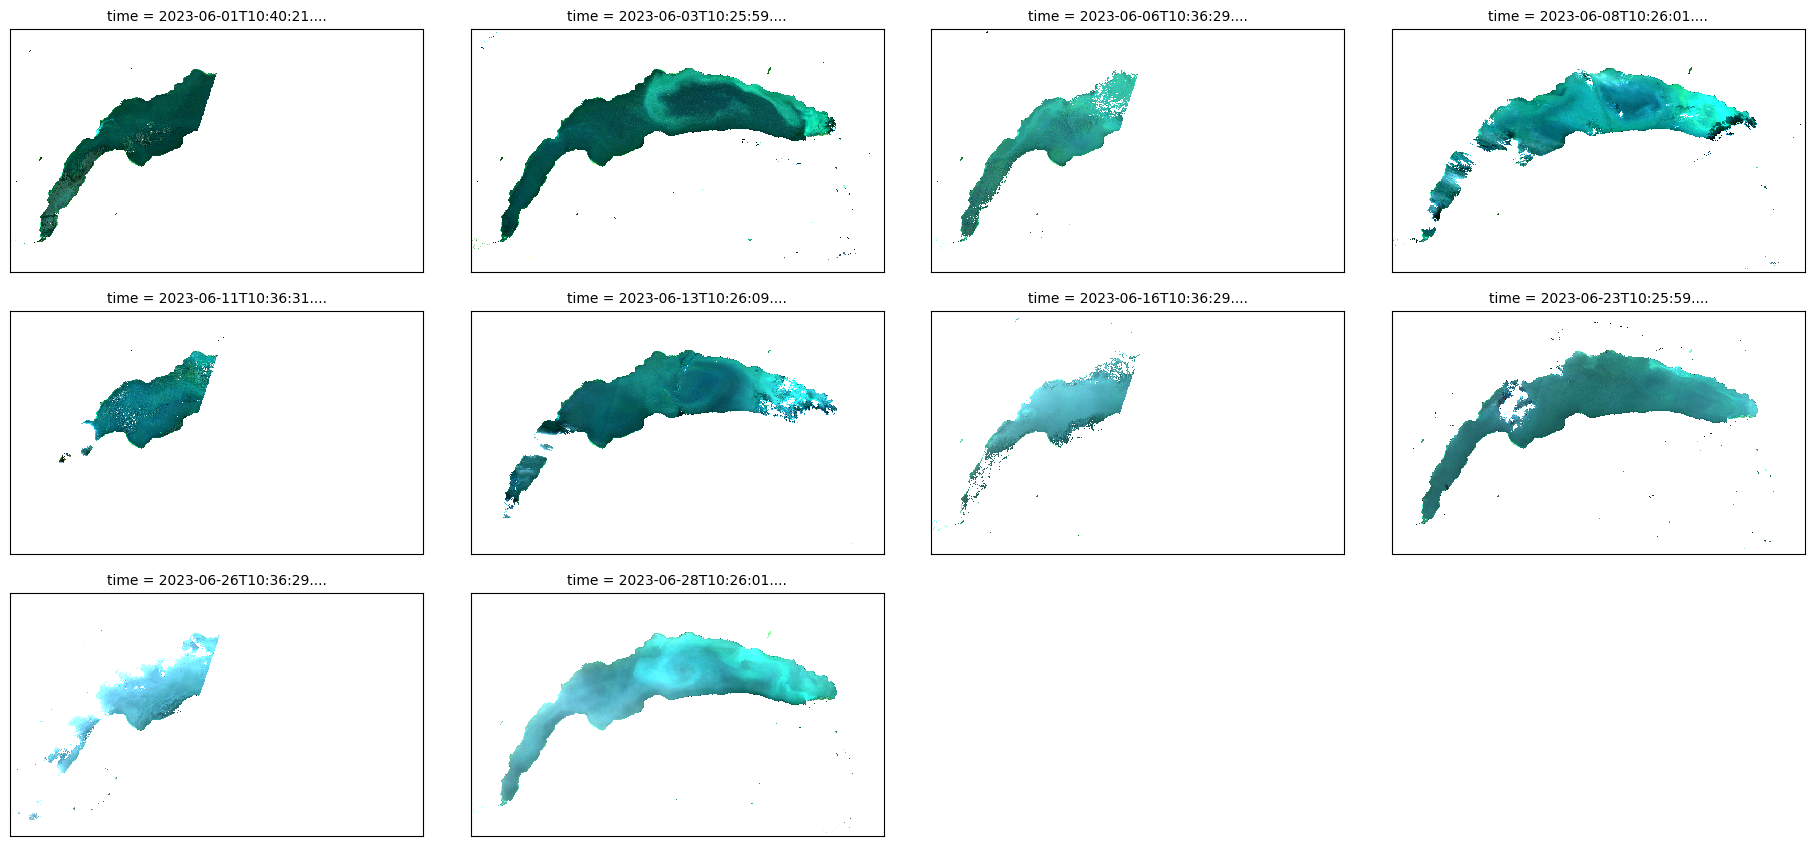

In [11]:
bands=[3,2,1]
coarsening=5
fig = dc.raster.Rrs.isel(wl=bands)[:,:,::coarsening,::coarsening].plot.imshow(col='time', col_wrap=4,robust=True,aspect=1.5)
for ax in fig.axes.flat:
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel('')
    ax.set_xlabel('')
fig

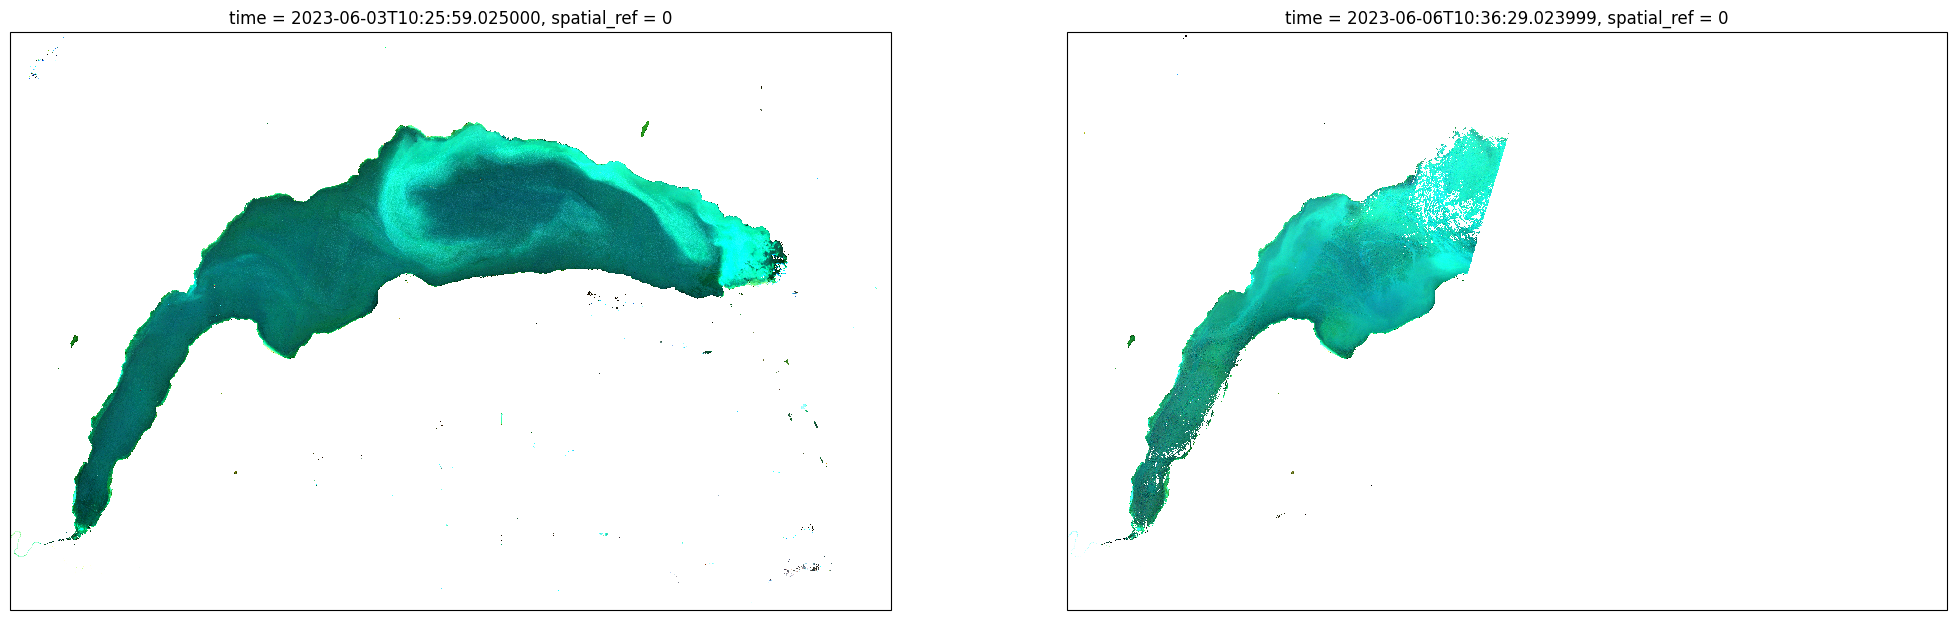

In [12]:
bands=[4,2,1]
#bands=[3,2,1]
gamma=1
import cartopy.crs as ccrs
str_epsg = str(dc.raster.rio.crs)
zone = str_epsg[-2:]
is_south = str_epsg[2] == 7
proj = ccrs.UTM(zone, is_south)
fig = plt.figure(figsize=(25, 15))
ax = plt.subplot(1, 2, 1, projection=proj)
(dc.raster.Rrs.isel(wl=bands,time=1)**(1/gamma)).plot.imshow(robust=True,subplot_kws=dict(projection=proj)) 
ax = plt.subplot(1, 2, 2, projection=proj)
(dc.raster.Rrs.isel(wl=bands,time=2)**(1/gamma)).plot.imshow(robust=True,subplot_kws=dict(projection=proj))

## **Check spectral datacube** (i.e., Remote Sensing Reflectance, R<sub>rs</sub>, sr<sup>-1</sup>)

To quickly check your data visually, you can use the *visual* module of *grstbx*. Please use the polygon tool to select and extract you region of interest for further analyses.

In [7]:

v=visual.view_spectral(dc.raster.Rrs)
v.visu()

Column
    [0] WidgetBox
        [0] Markdown(str)
        [1] Column
            [0] Row
                [0] Markdown(str)
                [1] RadioButtonGroup(options=[0, 1, 2, 3, 4, ...], value=2)
            [1] Row
                [0] Row
                    [0] Markdown(str)
                    [1] DatePicker(enabled_dates=[datetime.date(2023, ...], start=datetime.date(2023, 6, 1), value=datetime.date(2023, 6, 1))
                [1] Row
                    [0] Markdown(str)
                    [1] Select(options=['CartoDark', ...], value='CartoDark')
            [2] Row
                [0] Row
                    [0] Markdown(str)
                    [1] EditableRangeSlider(end=0.06, name='Range Slider', step=0.0001, value=(0, 0.02), width=300)
                [1] Row
                    [0] Markdown(str)
                    [1] FloatSlider(name='Opacity', step=0.05, value=0.95)
                [2] Row
                    [0] Markdown(str)
                    [1] Select(options=['CET_D13', 'bky', ...], value='CET_D13')
        [2] HoloViews(DynamicMap, height=800, sizing_mode='fixed', width=1200)

In [ ]:
geom_ = v.get_geom(v.aoi_stream,crs=dc.raster.rio.crs)
Rrs_clipped = dc.raster.Rrs.rio.clip(geom_.geometry.values)

In [ ]:
bands=[4,2,1]
bands=[3,2,1]

fig = Rrs_clipped.isel(wl=bands).plot.imshow(col='time', col_wrap=4,robust=True,aspect=1.5)
for ax in fig.axes.flat:
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel('')
    ax.set_xlabel('')
fig


## **Check water quality parameters** (e.g., Chl-a concentration from diverse "algorithms")

## First construct datacube of parameters
Choose between full image or clipped one:

In [ ]:
# if full image:
Rrs = dc.raster.Rrs
# or extracted region:
#Rrs = Rrs_clipped

### Check blue over green ratio for Chl retrieval with OC2 from NASA
$log_{10}(chlor\_a) = a_0 + \sum\limits_{i=1}^4 a_i \left(log_{10}\left(\frac{R_{rs}(\lambda_{blue})}{R_{rs}(\lambda_{green})}\right)\right)^i$

In [ ]:

# NASA OC2 fro MODIS; bands 488, 547 nm
a = [0.2500,-2.4752,1.4061,-2.8233,0.5405]
# NASA OC2 for OCTS; bands 490, 565 nm
a = [0.2236,-1.8296,1.9094,-2.9481,-0.1718]

ratio = np.log10(Rrs.isel(wl=1)/Rrs.isel(wl=2))
logchl=0
for i in range(len(a)):
    logchl+=a[i]*ratio**i
chl = 10**(logchl)
chl.name='Chl-a_OC2'
chl.attrs['units']='mg.m-3'
chl.attrs['description']= 'Chl-a concentration from NASA OC2 with OCTS parameterization, bands 490, 565 nm',
chl = chl.where((chl >= 0) & (chl <= 60))


In [ ]:

fig = plt.figure(figsize=(22, 15))
ax = plt.subplot(1, 2, 1, projection=proj)
chl.mean('time').plot.imshow(robust=True,subplot_kws=dict(projection=proj),cmap=cc.cm.CET_D13,vmin=0.5,vmax=4,cbar_kwargs={'shrink':0.35}) 
ax.set_title('$Average\ Chl\ a\ (\mu g\cdot L^{-1})$',fontsize=18)
ax = plt.subplot(1, 2, 2, projection=proj)
chl.std('time').plot.imshow(robust=True,subplot_kws=dict(projection=proj),cmap=cc.cm.CET_D1A,vmin=0,vmax=2.5,cbar_kwargs={'shrink':0.35})
ax.set_title('$Std.\ deviation\ Chl\ a\ (\mu g\cdot L^{-1})$',fontsize=18)
plt.tight_layout()

In [ ]:
fig=chl.plot.imshow(col='time', col_wrap=4,robust=True,cmap=cc.cm.CET_D13,aspect=1.7,vmin=0)
for ax in fig.axes.flat:
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel('')
    ax.set_xlabel('')

### CDOM retrieval based on Brezonik et al, 2015


In [ ]:
a = [1.872,-0.83]
acdom = np.exp(a[0] + a[1] * np.log(Rrs.isel(wl=1)/Rrs.isel(wl=5)))
acdom.name='a_cdom_b2015'
acdom.attrs['units']='m-1'
acdom.attrs['description']='CDOM absorption at 440 nm-1'
acdom= acdom.where((acdom >= 0) & (acdom <= 10))


### Total suspended particulate matter (SPM) from Nechad et al., 2010, 2016 formulation
spm in mg/L

In [ ]:
a = [610.94*np.pi, 0.2324/np.pi]
Rrs_ = Rrs.isel(wl=3)
spm = a[0] * Rrs_ / (1 - ( Rrs_/ a[1]))
spm.name='SPM_N2016'
spm.attrs['units']='mg/L'
spm.attrs['description']='Concentration of suspended particulate matter from band 665 nm'
spm= spm.where((spm >= 0) & (spm <= 150))


In [ ]:
watqual = xr.merge([chl,acdom,spm])

In [ ]:
v2b=visual.view_param(watqual)
v2b.visu()




# Further analyses and time series

In [ ]:
stacked = Rrs_clipped.dropna('time',thresh=0).stack(gridcell=["y", "x"]).dropna('gridcell',thresh=0)


In [ ]:
group_coord ='wl'
stat_coord='gridcell'
stats = xr.Dataset({'median':stacked.groupby(group_coord).median(stat_coord)})
stats['q25'] = stacked.groupby(group_coord).quantile(0.25,dim=stat_coord)
stats['q75'] = stacked.groupby(group_coord).quantile(0.75,dim=stat_coord)
stats['min'] = stacked.groupby(group_coord).min(stat_coord)
stats['max'] = stacked.groupby(group_coord).max(stat_coord)
stats['mean'] = stacked.groupby(group_coord).mean(stat_coord)
stats['std'] = stacked.groupby(group_coord).std(stat_coord)
stats['pix_num'] = stacked.count(stat_coord)

In [ ]:
%matplotlib inline
num_items = len(stats.time)
col_wrap=4
rows=int(np.ceil(num_items/col_wrap))

fig, axs = plt.subplots(nrows=rows,ncols=col_wrap, sharex=True,sharey=True, figsize=(20, rows*3.5))#,sharey=True
fig.subplots_adjust(hspace=0.1,wspace=0.1)
axs_ = axs.ravel()
[axi.set_axis_off() for axi in axs_]
for iax,(_,group) in enumerate(stats.groupby('time')): 
    date = group.time.dt.date.values
    
    axs_[iax].set_axis_on()
    axs_[iax].axhline(y=0,color='k',lw=1)
    axs_[iax].plot(group.wl,group['median'],c='k')
    axs_[iax].plot(group.wl,group['mean'],c='red',ls='--')
    axs_[iax].fill_between(group.wl, group['q25'], group['q75'],alpha=0.3,color='grey')
    axs_[iax].set_title(date)
plt.show()

In [ ]:
import geopandas as gpd
def get_buffer_box(p_lat, p_long, distance_m):
    # distance is d/2 of the square buffer around the point,
    # from center to corner;
    # find buffer width in meters
    buffer_width_m = distance_m  / np.sqrt(2)

    # EPSG:4326 sets Coordinate Reference System to WGS84 to match input
    wgs84_pt_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([p_long], [p_lat], crs='4326'))

    # find suitable projected coordinate system for distance
    utm_crs = wgs84_pt_gdf.estimate_utm_crs()
    # reproject to UTM -> create square buffer (cap_style = 3) around point -> reproject back to WGS84
    wgs84_buffer = wgs84_pt_gdf.to_crs(utm_crs).buffer(buffer_width_m, cap_style=3).to_crs('EPSG:4326')
    # wgs84_buffer.bounds returns bounding box as pandas dataframe,
    # .values[0] will extract first row as an array
    return wgs84_buffer#.bounds

In [ ]:
#set location, geom coordinate system and extent
lat,lon= 46.5002275, 6.6608353
extent=100
# set subset (Area of interest)
buffer = get_buffer_box(lat, lon, extent)

# wkt = misc.wktbox(lon, lat,width=width,height=height)
lon_min, lat_min, lon_max, lat_max = buffer.bounds.values[0]

print(buffer.bounds)

In [ ]:
minx, miny, maxx, maxy = buffer.to_crs(3857).bounds.values[0]
print(minx, miny, maxx, maxy)

In [ ]:
clipped = dc.raster.Rrs.rio.clip_box(minx, miny, maxx, maxy)

In [ ]:
clipped

# Check surface rugosity via sunglint BRDF

In [ ]:

raster = dc.raster.BRDFg#.isel(time=-1,drop=True)
ds = hv.Dataset(raster.persist())
im= ds.to(hv.Image, ['x', 'y'], dynamic=True).opts(cmap= 'gray',colorbar=True)#.hist(bin_range=(0,0.02) ) 
widget = pn.widgets.RangeSlider(start=0, end=0.1,step=0.0005)

jscode = """
    color_mapper.low = cb_obj.value[0];
    color_mapper.high = cb_obj.value[1];
"""
link = widget.jslink(im, code={'value': jscode})
pn.Column(widget, im)

In [ ]:

shaded = []
for name, raster in dc.raster.BRDFg.groupby('time'):
    img = tf.shade(raster.squeeze()[::-1],cmap=cc.gray)
    img.name = str(name)
    shaded.append(img)

imgs = tf.Images(*shaded)
imgs.num_cols = 3
imgs

In [ ]:
visual.image_viewer().param_date(spm,cmap='bgyw')

In [ ]:

shaded = []
for name, raster in dc.Rrs.Rrs.isel(time=-1).groupby('wl'):
    img = tf.shade(raster,cmap=cc.kbc)
    img.name = '{:.2f}'.format(name)+' nm'
    shaded.append(img)

imgs = tf.Images(*shaded)
imgs.num_cols = 5
imgs

In [ ]:
shaded = []
for name, raster in BRDFg.groupby('time'):
    img = tf.shade(raster,cmap=cc.gray, span=(0,0.025),how='log')
    img.name = str(name)
    shaded.append(img)

imgs = tf.Images(*shaded)
imgs.num_cols = 4
imgs

# Play with time series

In [ ]:
raster = chl

param = raster.name
third_dim = 'time'
time= raster.time.data
Ntime = len(time)
ds = hv.Dataset(raster.persist())
im= ds.to(hv.Image, ['x', 'y'], dynamic=True).opts(cmap= 'RdBu_r',colorbar=True,clim=(0,100))#.hist(bin_range=(0,0.02) ) 

polys = hv.Polygons([])
box_stream = hv.streams.BoxEdit(source=polys)
dmap, dmap_std=[],[]

def roi_curves(data,ds=ds):    
    if not data or not any(len(d) for d in data.values()):
        return hv.NdOverlay({0: hv.Curve([],'time', param)})

    curves,envelope = {},{}
    data = zip(data['x0'], data['x1'], data['y0'], data['y1'])
    for i, (x0, x1, y0, y1) in enumerate(data):
        selection = ds.select(x=(x0, x1), y=(y0, y1))
        mean = selection.aggregate(third_dim, np.nanmean).data
        print(mean)
        #std = selection.aggregate(third_dim, np.std).data
        time = mean[third_dim]

        curves[i]= hv.Curve((time,mean[param]),'time', param) 

    return hv.NdOverlay(curves)


# a bit dirty to have two similar function, but holoviews does not like mixing Curve and Spread for the same stream
def roi_spreads(data,ds=ds):    
    if not data or not any(len(d) for d in data.values()):
        return hv.NdOverlay({0: hv.Curve([],'time', param)})

    curves,envelope = {},{}
    data = zip(data['x0'], data['x1'], data['y0'], data['y1'])
    for i, (x0, x1, y0, y1) in enumerate(data):
        selection = ds.select(x=(x0, x1), y=(y0, y1))
        mean = selection.aggregate(third_dim, np.nanmean).data
        std = selection.aggregate(third_dim, np.nanstd).data
        time = mean[third_dim]

        curves[i]=  hv.Spread((time,mean[param],std[param]),fill_alpha=0.3)

    return hv.NdOverlay(curves)

mean=hv.DynamicMap(roi_curves,streams=[box_stream])
std =hv.DynamicMap(roi_spreads, streams=[box_stream])    


In [ ]:
# visualize and play
graphs = ((mean*std ).relabel(param))
layout = (im * polys +graphs    ).opts(
    opts.Curve(width=1200,height=600, framewise=True), 
    opts.Polygons(fill_alpha=0.2, color='green',line_color='black'), 
    ).cols(1)
layout 